In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
import yfinance as yf
import statsmodels as st 
import scipy.stats as sc

In [2]:
tickers= ['SPY', 'TLT', 'RWR']

In [5]:
data= yf.download(tickers, start='2010-01-01' , end='2022-12-31')

[*********************100%***********************]  3 of 3 completed


In [6]:
returns= np.log(data['Adj Close']/ data['Adj Close'].shift(1)).dropna()

In [7]:
returns.describe()

,RWR,SPY,TLT
count,3272.000000,3272.000000,3272.000000
mean,0.000308,0.000453,0.000135
std,0.013860,0.011131,0.009511
min,-0.202247,-0.115887,-0.069011
25%,-0.005650,-0.003735,-0.005493
50%,0.000920,0.000654,0.000562
75%,0.007120,0.005736,0.005752
max,0.090170,0.086731,0.072503


In [8]:
0.000308*100

0.0308

In [9]:
0.000453*100

0.0453

In [10]:
0.000135*100

0.0135

In [12]:
np.median(returns['TLT'])

0.0005621855873202699

In [13]:
returns['TLT'].quantile(0.25)

-0.005493199812083726

In [14]:
weight= 1/len(tickers)

In [15]:
weight

0.3333333333333333

In [16]:
weights =( weight,weight,weight )

In [17]:
weights

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333)

In [18]:
sum(weights)

1.0

In [19]:
portret = returns.dot(weights)

In [20]:
portret

Date
2010-01-04    0.003816
2010-01-05    0.003299
2010-01-06   -0.004462
2010-01-07    0.005012
2010-01-08   -0.002157
                ...   
2022-12-23   -0.000216
2022-12-27   -0.008050
2022-12-28   -0.012258
2022-12-29    0.016742
2022-12-30   -0.006515
Length: 3272, dtype: float64

In [21]:
portret.describe()

count    3272.000000
mean        0.000299
std         0.007538
min        -0.085126
25%        -0.002996
50%         0.000665
75%         0.004042
max         0.052634
dtype: float64

<AxesSubplot:xlabel='Date'>

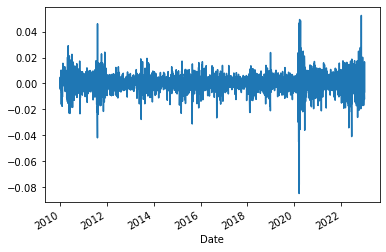

In [22]:
portret.plot()

In [23]:
portret.skew()

-1.0893362118776728

In [24]:
portret.kurtosis()

15.552511734668336

In [26]:
sc.skew( portret)

-1.0888367581974954

In [27]:
sc.kurtosis(portret )

15.526922657570317

In [32]:
covariance= returns.cov()

In [33]:
covariance

,RWR,SPY,TLT
RWR,0.000192,0.000116,-0.000024
SPY,0.000116,0.000124,-0.000040
TLT,-0.000024,-0.000040,0.000090


In [30]:
covarianc= returns.cov()*252

In [31]:
print( covarianc)

          RWR       SPY       TLT
RWR  0.048410  0.029352 -0.006136
SPY  0.029352  0.031221 -0.009994
TLT -0.006136 -0.009994  0.022795


<AxesSubplot:>

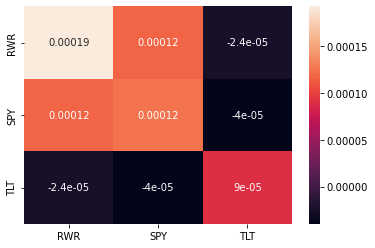

In [35]:
sb.heatmap(covariance, annot=True)

<AxesSubplot:>

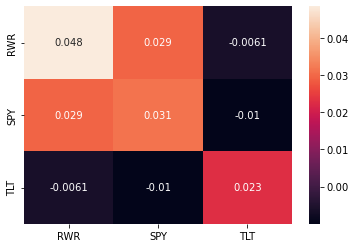

In [36]:
sb.heatmap(covarianc, annot=True)

In [37]:
0.00019*252

0.047880000000000006

In [46]:
portvariance = np.transpose( weights) @ covarianc @ weights

In [47]:
portvariance

0.014319048425822163

In [48]:
portvolatility= np.sqrt(portvariance )

In [49]:
portvolatility

0.1196622263950582

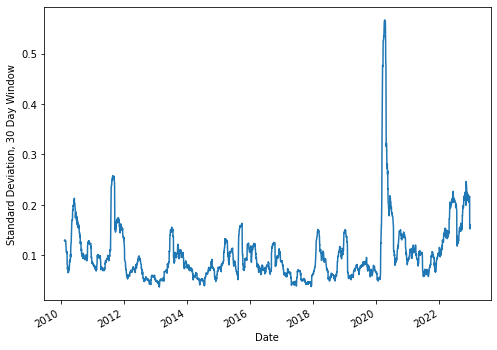

In [56]:
windowed= portret.rolling(30)
vol= windowed.std()*np.sqrt(252)
vol.plot().set_ylabel('Standard Deviation, 30 Day Window')
plt.gcf().set_size_inches(8,6)

In [53]:
portret.cov()

TypeError: cov() missing 1 required positional argument: 'other'

In [54]:
covariancport= portret.cov()*252

TypeError: cov() missing 1 required positional argument: 'other'

In [55]:
portret

Date
2010-01-04    0.003816
2010-01-05    0.003299
2010-01-06   -0.004462
2010-01-07    0.005012
2010-01-08   -0.002157
                ...   
2022-12-23   -0.000216
2022-12-27   -0.008050
2022-12-28   -0.012258
2022-12-29    0.016742
2022-12-30   -0.006515
Length: 3272, dtype: float64

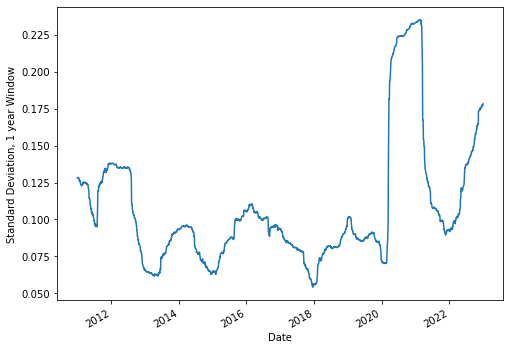

In [59]:
windowed= portret.rolling(252)
vol= windowed.std()*np.sqrt(252)
vol.plot().set_ylabel('Standard Deviation, 1 year Window')
plt.gcf().set_size_inches(8,6)

<AxesSubplot:>

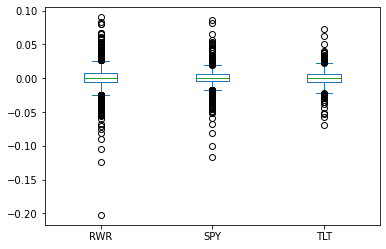

In [62]:
returns.plot(kind='box')

<AxesSubplot:>

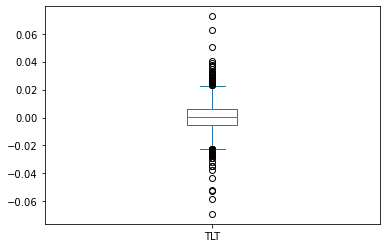

In [63]:
returns['TLT'].plot(kind='box')

<AxesSubplot:>

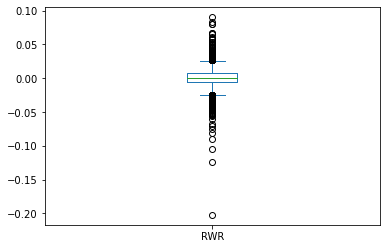

In [64]:
returns['RWR'].plot(kind='box')

<AxesSubplot:>

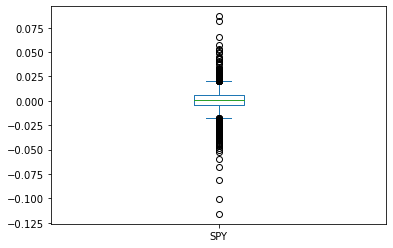

In [65]:
returns['SPY'].plot(kind='box')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SPY'>

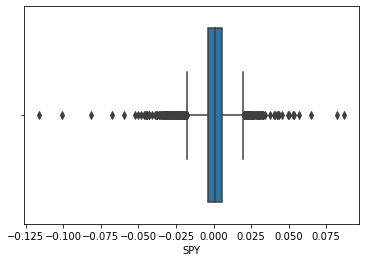

In [66]:
sb.boxplot(returns['SPY'])

In [67]:
returns.corr()

,RWR,SPY,TLT
RWR,1.000000,0.755006,-0.184723
SPY,0.755006,1.000000,-0.374610
TLT,-0.184723,-0.374610,1.000000


In [68]:
returns.cov()

,RWR,SPY,TLT
RWR,0.000192,0.000116,-0.000024
SPY,0.000116,0.000124,-0.000040
TLT,-0.000024,-0.000040,0.000090


In [69]:
returns.describe()

,RWR,SPY,TLT
count,3272.000000,3272.000000,3272.000000
mean,0.000308,0.000453,0.000135
std,0.013860,0.011131,0.009511
min,-0.202247,-0.115887,-0.069011
25%,-0.005650,-0.003735,-0.005493
50%,0.000920,0.000654,0.000562
75%,0.007120,0.005736,0.005752
max,0.090170,0.086731,0.072503


In [70]:
np.sqrt(0.00019)

0.013784048752090222

<AxesSubplot:>

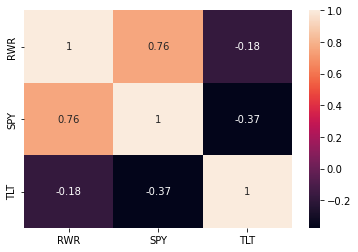

In [72]:
sb.heatmap(returns.corr(), annot=True)